In [1]:
import fitsio
import matplotlib.pyplot as plt
import numpy 
import pandas as pd
import lsst.daf.butler as dafButler
import numpy as np
import astropy.units as u
from smatch import match
from lsst.afw.table import SimpleCatalog
from scipy.signal import medfilt

In [2]:
repo = '/repo/main'
collections =["LSSTComCam/runs/DRP/DP1/w_2025_05/DM-48666"]
butler = dafButler.Butler(repo, collections=collections)
all_collections = butler.registry.queryCollections()


In [4]:
all_collections=[ i for i in all_collections if "LSSTComCam" in i]

In [5]:

butler = dafButler.Butler(repo, collections=all_collections)


In [6]:
refs=butler.registry.queryDatasets('ccdVisitTable')

In [8]:
sorted(refs)

[DatasetRef(DatasetType('ccdVisitTable', {instrument}, DataFrame), {instrument: 'LSSTComCam'}, run='LSSTComCam/runs/DRP/DP1/w_2025_03/DM-48478/20250117T153854Z', id=bfde403c-c250-4489-a0c9-d9798bc2b81c),
 DatasetRef(DatasetType('ccdVisitTable', {instrument}, DataFrame), {instrument: 'LSSTComCam'}, run='LSSTComCam/runs/DRP/DP1/w_2025_04/DM-48556/20250124T173047Z', id=5ad0db51-95f6-4d5e-ad29-8528e4c3a39f),
 DatasetRef(DatasetType('ccdVisitTable', {instrument}, DataFrame), {instrument: 'LSSTComCam'}, run='LSSTComCam/runs/DRP/DP1/w_2025_05/DM-48666/20250131T132156Z', id=1d110d50-08dd-41f2-8f0f-4e51a525c707),
 DatasetRef(DatasetType('ccdVisitTable', {instrument}, DataFrame), {instrument: 'LSSTComCam'}, run='LSSTComCam/runs/DRP/DP1/w_2025_05/DM-48666/20250131T171816Z', id=195547c0-5fd2-46e5-932c-b369b11168ab),
 DatasetRef(DatasetType('ccdVisitTable', {instrument}, DataFrame), {instrument: 'LSSTComCam'}, run='u/jbosch/DM-47632/drp/20250123T122544Z', id=6e2675eb-f02e-43e8-bea4-2d5dae9b5cf8),
 

In [9]:
ccd_visit_table = butler.get(butler.query_datasets('ccdVisitTable')[0])

In [10]:
ccd_visit_table

,visitId,physical_filter,band,ra,dec,pixelScale,zenithDistance,expTime,zeroPoint,psfSigma,...,xSize,ySize,llcra,llcdec,ulcra,ulcdec,urcra,urcdec,lrcra,lrcdec
ccdVisitId,,,,,,,,,,,,,,,,,,,,,
45508261120,2024110800245,i_06,i,53.004537,-28.190328,0.200356,15.811996,30.0,31.769550,1.835184,...,4071,3999,52.852323,-28.275736,52.910485,-28.054942,53.156327,-28.104874,53.098765,-28.325696
45508261121,2024110800245,i_06,i,53.064358,-27.961231,0.200288,15.809620,30.0,31.775599,1.750403,...,4071,3999,52.912533,-28.046431,52.970554,-27.825756,53.215825,-27.875895,53.158302,-28.096589
45508261122,2024110800245,i_06,i,53.123910,-27.731683,0.200355,15.810764,30.0,31.767769,1.796399,...,4071,3999,52.972637,-27.817115,53.029985,-27.596209,53.274899,-27.646056,53.217962,-27.866962
45508261123,2024110800245,i_06,i,53.264696,-28.242507,0.200287,15.576916,30.0,31.775053,1.826778,...,4071,3999,53.112842,-28.328206,53.170256,-28.107344,53.416240,-28.156722,53.359386,-28.377698
45508261124,2024110800245,i_06,i,53.323752,-28.013505,0.200225,15.574671,30.0,31.781845,1.718143,...,4071,3999,53.172286,-28.099118,53.229509,-27.878352,53.474975,-27.927736,53.418223,-28.148598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45785178884,2024121100611,r_03,r,106.365615,-10.479400,0.200265,35.501637,30.0,31.975525,1.656340,...,4071,3999,106.214867,-10.536264,106.310459,-10.330185,106.516319,-10.422468,106.420831,-10.628605
45785178885,2024121100611,r_03,r,106.464699,-10.265370,0.200328,35.558491,30.0,31.975042,1.653349,...,4071,3999,106.314055,-10.322266,106.409574,-10.116063,106.615364,-10.208352,106.519886,-10.414584
45785178886,2024121100611,r_03,r,106.484077,-10.790859,0.200398,35.217571,30.0,31.972706,1.630776,...,4071,3999,106.333109,-10.847719,106.428887,-10.641554,106.635009,-10.733979,106.539381,-10.940306


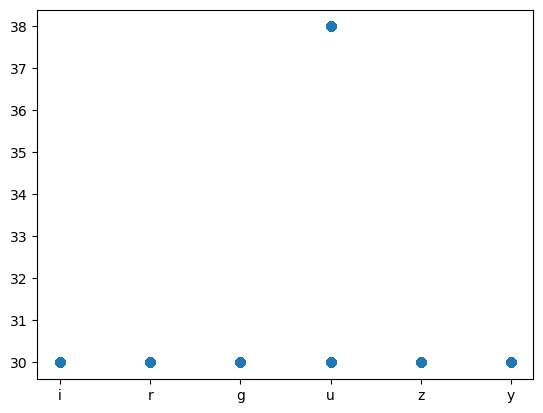

In [5]:
plt.scatter(ccd_visit_table['band'],ccd_visit_table["expTime"])
#plt.yscale('log')

In [35]:
from lsst.analysis.tools.actions.vector import VisitPlotFlagSelector, SnSelector, StarSelector, MagSelector, ConvertFluxToMag
vpfs=VisitPlotFlagSelector()
sns=SnSelector(fluxType="psfFlux",threshold=100)
sts=StarSelector(vectorKey="extendedness")
mgs=MagSelector(fluxType="psfFlux", maxMag=20)

In [41]:
bs_dict={}
np.random.seed(31415)
for exptime in [30,15,10]:
    visit = np.random.choice(ccd_visit_table.loc[ccd_visit_table["expTime"] == exptime, 'visitId'], 1, replace=False)[0]
    bs_dict[f"ref_{exptime}"] = butler.query_datasets('sourceTable_visit', data_id={'visit':visit})[0]
    st= butler.get(bs_dict[f"ref_{exptime}"])
    sel=None
    for selector in [vpfs,sns,sts,mgs]:
        if sel is None:
            sel = selector(st)
        else:
            sel &= selector(st)
    
    bs_dict[f"st_{exptime}"] = st[sel]

In [67]:
monster_refs=None
for exptime in [30,15,10]:
    if monster_refs is None:
        monster_refs = butler.query_datasets('the_monster_20240904', data_id=bs_dict[f"ref_{exptime}"].dataId)
    else:
        monster_refs += butler.query_datasets('the_monster_20240904', data_id=bs_dict[f"ref_{exptime}"].dataId)
monster_refs = np.unique(monster_refs)
ref_cat=None
for ref in monster_refs:
    if ref_cat == None:
        tmp = butler.get(ref)
        ref_cat = SimpleCatalog(tmp.schema)
        ref_cat.extend(tmp)
    else: 
        ref_cat.extend(butler.get(ref))


In [69]:
for exptime in [30,15,10]:
    bs_dict[f"match_{exptime}"]=match(ra1=bs_dict[f"st_{exptime}"]["coord_ra"], 
          dec1=bs_dict[f"st_{exptime}"]['coord_dec'], 
          ra2=np.degrees(ref_cat['coord_ra']), 
          dec2=np.degrees(ref_cat['coord_dec']), 
          radius1=0.25)

In [82]:
def convert_to_mag(flux):
    flux = np.asarray(flux)
    return (flux * u.nJy).to(u.ABmag).value
ref_cat_mag = convert_to_mag(ref_cat["monster_SynthLSST_r_flux"])
ref_cat_flux = ref_cat["monster_SynthLSST_r_flux"]

In [83]:
for exptime in [30,15,10]:
    bs_dict[f'st_{exptime}']['psfMag']=cfm(bs_dict[f'st_{exptime}'])
    bs_dict[f"bright_val_{exptime}"] = np.percentile(bs_dict[f'st_{exptime}']['psfMag'], [1])[0]

[(13.0, 20.0),
 (0.95, 1.1),
 Text(0.5, 0, 'monster_SynthLSST_r_mag'),
 Text(0, 0.5, 'r_psfFlux/monster_SynthLSST_r_flux')]

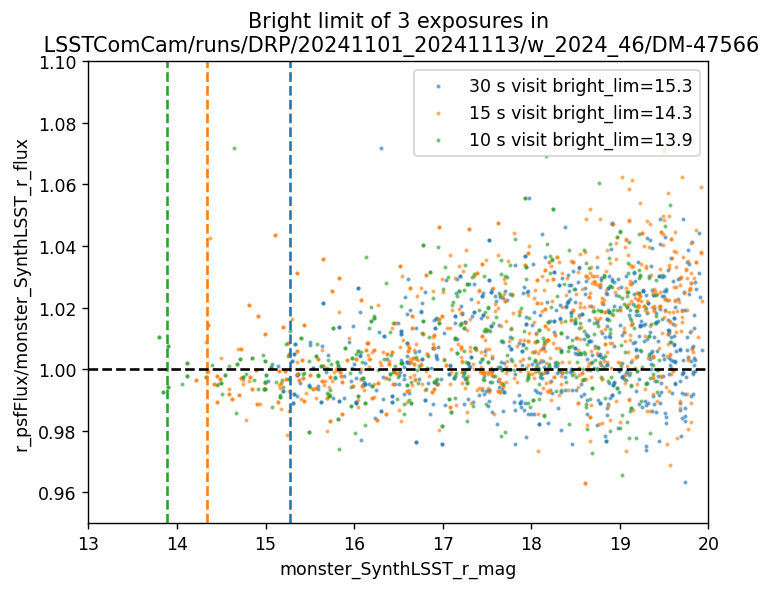

In [108]:
fig, ax= plt.subplots(1, dpi=125)
clist=["tab:blue","tab:orange","tab:green"]
ax.set_title("Bright limit of 3 exposures in\n LSSTComCam/runs/DRP/20241101_20241113/w_2024_46/DM-47566")
for i,exptime in enumerate([30,15,10]):
    ref_sel = bs_dict[f"match_{exptime}"]['i2']
    st_sel = bs_dict[f"match_{exptime}"]['i1']
    ax.scatter(ref_cat_mag[ref_sel], 
               bs_dict[f'st_{exptime}']['psfFlux'].values[st_sel]/ref_cat_flux[ref_sel], 
               label=f"{exptime} s visit bright_lim={bs_dict[f'bright_val_{exptime}']:0.1f}", 
               s=2, c=clist[i], alpha=0.5)
    #medians=medfilt(bs_dict[f'st_{exptime}']['psfFlux'].values[st_sel]/ref_cat_flux[ref_sel], 21)
    #ax.plot(ref_cat_mag[ref_sel], medians, c=clist[i])
    ax.axvline(bs_dict[f"bright_val_{exptime}"], ls="dashed", c=clist[i])
ax.axhline(1, c="k", ls="dashed")
plt.legend()
ax.set(xlim=(13,20), ylim=(0.95,1.1), xlabel="monster_SynthLSST_r_mag", ylabel="r_psfFlux/monster_SynthLSST_r_flux")


In [56]:
from lsst.meas.algorithms import LoadReferenceObjectsConfig, ReferenceObjectLoader

In [60]:
filterMap={}
for source, target in [
    ("empty", "monster_SynthLSST_r"),
    ("white", "monster_SynthLSST_r"),
    ("u_02", "monster_SynthLSST_u"),
    ("u_05", "monster_SynthLSST_u"),
    ("u_06", "monster_SynthLSST_u"),
    ("g_01", "monster_SynthLSST_g"),
    ("g_07", "monster_SynthLSST_g"),
    ("r_03", "monster_SynthLSST_r"),
    ("i_06", "monster_SynthLSST_i"),
    ("z_02", "monster_SynthLSST_z"),
    ("z_03", "monster_SynthLSST_z"),
    ("y_04", "monster_SynthLSST_y"),
    ("u", "monster_SynthLSST_u"),
    ("g", "monster_SynthLSST_g"),
    ("r", "monster_SynthLSST_r"),
    ("i", "monster_SynthLSST_i"),
    ("z", "monster_SynthLSST_z"),
    ("y", "monster_SynthLSST_y"),
]:
    filterMap[source] = target

In [61]:
LoadReferenceObjectsConfig(filterMap=filterMap)

lsst.meas.algorithms.loadReferenceObjects.LoadReferenceObjectsConfig(pixelMargin=250, filterMap={'empty': 'monster_SynthLSST_r', 'white': 'monster_SynthLSST_r', 'u_02': 'monster_SynthLSST_u', 'u_05': 'monster_SynthLSST_u', 'u_06': 'monster_SynthLSST_u', 'g_01': 'monster_SynthLSST_g', 'g_07': 'monster_SynthLSST_g', 'r_03': 'monster_SynthLSST_r', 'i_06': 'monster_SynthLSST_i', 'z_02': 'monster_SynthLSST_z', 'z_03': 'monster_SynthLSST_z', 'y_04': 'monster_SynthLSST_y', 'u': 'monster_SynthLSST_u', 'g': 'monster_SynthLSST_g', 'r': 'monster_SynthLSST_r', 'i': 'monster_SynthLSST_i', 'z': 'monster_SynthLSST_z', 'y': 'monster_SynthLSST_y'}, requireProperMotion=False)

In [48]:

st= bs_dict["st_10"]


In [49]:
st.shape

(580, 165)

In [36]:
sns(bs_dict["st_30"]).sum()

1271

In [9]:
bs_dict

{'ref_30': DatasetRef(DatasetType('sourceTable_visit', {band, instrument, day_obs, physical_filter, visit}, DataFrame), {instrument: 'LSSTComCam', visit: 2024111100090, band: 'r', day_obs: 20241111, physical_filter: 'r_03'}, run='LSSTComCam/runs/DRP/20241101_20241113/w_2024_46/DM-47566/20241115T150602Z', id=3f8671ea-0bce-4f4e-acc2-25110e11c7bd),
 'st_30':                      coord_ra  coord_dec          visit  detector  \
 sourceId                                                            
 190980868334944257  53.474701 -27.669404  2024111100090         0   
 190980868334944258  53.497632 -27.745711  2024111100090         0   
 190980868334944259  53.507631 -27.778843  2024111100090         0   
 190980868334944260  53.517198 -27.812246  2024111100090         0   
 190980868334944261  53.507223 -27.780521  2024111100090         0   
 ...                       ...        ...            ...       ...   
 190980868368500370  52.856821 -28.301990  2024111100090         8   
 190980868368